# Imports and downloads

In [87]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math 
import string
import re
from sklearn.pipeline import Pipeline
from nltk.tokenize import wordpunct_tokenize
import nltk

In [2]:
nltk.download("brown")

[nltk_data] Downloading package brown to /home/sebas/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
from nltk.corpus import brown
brown_corpus = brown.words()

In [4]:
len(brown_corpus)

1161192

In [5]:
lines = list()

with open("train.txt", "r") as fp:
    lines = fp.readlines()

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
y_train = [x.lower().split('\t')[0] for x in lines]
x_train = [''.join(x.lower().split('\t')[1:]) for x in lines]
x_train = [wordpunct_tokenize(x) for x in x_train]

In [8]:
labels = set(y_train)

In [9]:
%pprint

Pretty printing has been turned OFF


In [10]:
x_train[0]

['the', 'sheraton', 'was', 'a', 'wonderful', 'hotel', '!', 'when', 'me', 'and', 'my', 'mom', 'flew', 'in', 'we', 'were', 'really', 'tired', 'so', 'we', 'decided', 'to', 'take', 'a', 'quick', 'nap', '.', 'we', 'didnt', 'want', 'to', 'get', 'up', '!', 'the', 'beds', 'are', 'absolutely', 'to', 'die', 'for', '.', 'i', 'wanted', 'to', 'take', 'it', 'home', 'with', 'me', '.', 'the', 'service', 'was', 'great', 'and', 'this', 'was', 'probably', 'one', 'of', 'the', 'biggest', 'if', 'not', 'the', 'biggest', 'hotel', 'ive', 'ever', 'stayed', 'in', '.', 'they', 'had', 'a', 'really', 'nice', 'restaurant', 'inside', 'with', 'excellent', 'food', '.']

In [11]:
%pprint

Pretty printing has been turned ON


In [12]:
lens_train = [len(x) for x in x_train]

(array([426., 549., 249., 103.,  45.,  16.,   4.,   5.,   2.,   1.]),
 array([ 28. , 111.6, 195.2, 278.8, 362.4, 446. , 529.6, 613.2, 696.8,
        780.4, 864. ]),
 <BarContainer object of 10 artists>)

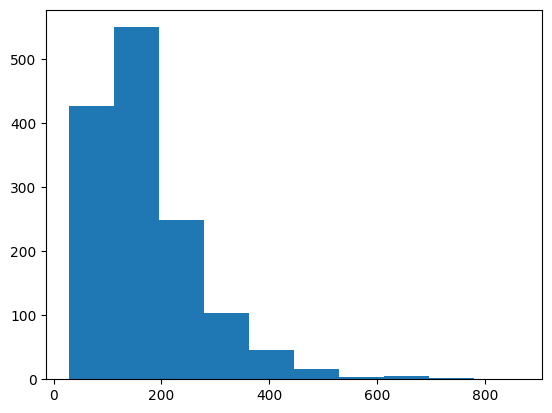

In [13]:
plt.hist(lens_train)

In [14]:
max(lens_train)

864

In [15]:
all_text = ' '.join([' '.join(x) for x in x_train])

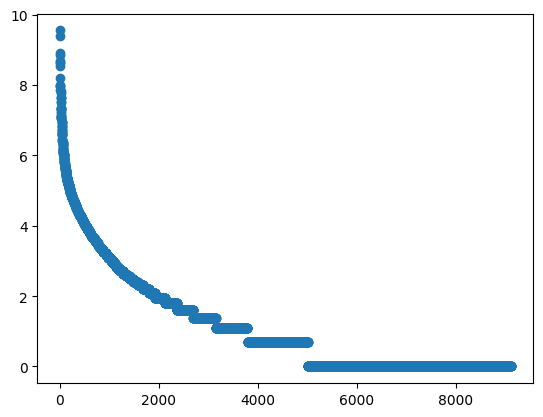

In [16]:
all_text_s = pd.Series(all_text.split(' '))
n_unique_words = len(all_text_s.unique())
word_counts = all_text_s.value_counts()
plt.scatter(range(n_unique_words), [math.log(x) for x in word_counts])
plt.show()

In [17]:
n_unique_words

9111

In [18]:
word_counts[word_counts > 5]

the              14021
.                11888
,                 7418
and               6961
to                5930
                 ...  
comparable           6
wear                 6
sophisticated        6
wearing              6
certificate          6
Name: count, Length: 2362, dtype: int64

In [19]:
#from nltk.test.gensim_fixt import setup_module
#setup_module()

In [20]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     /home/sebas/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [21]:
import gensim
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [22]:
#model.most_similar(positive=['great','bad'], negative=['good'], topn = 5)

In [23]:
vocab = list(model.key_to_index.keys())

In [24]:
reviews_embeddings = list()

for i, x in enumerate(x_train):
    if (i%100) == 0:
        print(i)
    word_sum = sum([model[y] for y in x if y in vocab])
    reviews_embeddings.append(word_sum)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [25]:
len(reviews_embeddings)

1400

In [26]:
RANDOM_STATE = 123

In [27]:
X = pd.DataFrame(reviews_embeddings)
y = y_train

In [28]:
#X

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

In [30]:
#error

NameError: name 'error' is not defined

In [31]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, random_state=RANDOM_STATE)


In [48]:
model = LogisticRegression(max_iter=10000)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = LogisticRegression(max_iter=10000)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.7314285714285714
0.7307142857142858


In [49]:
model = SVC()


model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = SVC()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6828571428571428
0.6085714285714285


In [50]:
model = RandomForestClassifier(n_estimators=100)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = RandomForestClassifier(n_estimators=100)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6428571428571429
0.6235714285714286


In [51]:
model = GaussianNB()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = GaussianNB()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.3628571428571429
0.3878571428571428


In [52]:
model = AdaBoostClassifier()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = AdaBoostClassifier()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5857142857142857
0.5549999999999999


In [53]:

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.7171428571428572
0.7449999999999999


In [54]:
#x_tr

In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_tr = ss.fit_transform(x_tr)
x_te = ss.transform(x_te)

In [56]:
#x_tr

In [57]:
model = LogisticRegression(max_iter=10000)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = LogisticRegression(max_iter=10000)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.7314285714285714
0.7307142857142858


In [58]:
model = SVC()


model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = SVC()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6828571428571428
0.6085714285714285


In [59]:
model = RandomForestClassifier(n_estimators=100)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = RandomForestClassifier(n_estimators=100)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6142857142857143
0.6221428571428571


In [60]:
model = GaussianNB()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = GaussianNB()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.3628571428571429
0.3878571428571428


In [61]:
model = AdaBoostClassifier()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = AdaBoostClassifier()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5857142857142857
0.5549999999999999


In [62]:

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.7228571428571429
0.7485714285714286


In [88]:
Embeds = pd.read_csv("Embeddings.csv", index_col=0)
words_dict = pd.read_csv("words_dict.csv", index_col=0)

In [89]:
Embeds = Embeds.to_numpy()
words_dict = words_dict.to_dict()

In [90]:
words_dict = words_dict['0']

In [91]:
words_dict = dict(zip(words_dict.values(), words_dict.keys()))

In [92]:
vocab = list(words_dict.keys())

In [93]:
#x_train

In [94]:
#[Embeds[words_dict[y]] for y in x_train[0] if y in words_dict.keys()]

In [95]:
reviews_embeddings = list()

for i, x in enumerate(x_train):
    if (i%100) == 0:
        print(i)
    word_sum = sum([Embeds[words_dict[y]] for y in x if y in words_dict.keys()])
    reviews_embeddings.append(word_sum)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [96]:
X = pd.DataFrame(reviews_embeddings)
y = y_train

In [97]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, random_state=RANDOM_STATE)


In [73]:
model = LogisticRegression(max_iter=10000)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = LogisticRegression(max_iter=10000)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5914285714285714
0.6221428571428571


In [74]:
model = SVC()


model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = SVC()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6514285714285715
0.6442857142857144


In [75]:
model = RandomForestClassifier(n_estimators=100)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = RandomForestClassifier(n_estimators=100)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5457142857142857
0.5564285714285713


In [76]:
model = GaussianNB()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = GaussianNB()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.34285714285714286
0.3685714285714286


In [77]:
model = AdaBoostClassifier()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = AdaBoostClassifier()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5457142857142857
0.5164285714285715


In [78]:

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6885714285714286
0.6807142857142857


In [79]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_tr = ss.fit_transform(x_tr)
x_te = ss.transform(x_te)

In [80]:
#x_tr

In [81]:
model = LogisticRegression(max_iter=10000)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = LogisticRegression(max_iter=10000)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6514285714285715
0.6221428571428571


In [82]:
model = SVC()


model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = SVC()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6571428571428571
0.6442857142857144


In [83]:
model = RandomForestClassifier(n_estimators=100)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = RandomForestClassifier(n_estimators=100)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5714285714285714
0.5664285714285715


In [84]:
model = GaussianNB()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = GaussianNB()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.34285714285714286
0.3685714285714286


In [85]:
model = AdaBoostClassifier()

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = AdaBoostClassifier()

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.5457142857142857
0.5164285714285715


In [98]:

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

model.fit(x_tr, y_tr)

preds = model.predict(x_te)
print(accuracy_score(preds, y_te))

model = MLPClassifier((1000, 1000),max_iter=2000)#, solver='lbfgs', verbose=True)

predictions = cross_val_score(model, X, y, cv=KFold(n_splits=5,   shuffle=True, random_state=RANDOM_STATE), scoring='accuracy')
print(predictions.mean())

0.6914285714285714
0.68
